In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_loader import DataLoader
from engine import GammaScalping
# from dotenv import load_dotenv
import yfinance as yf

In [18]:
# 加载 .env 文件
# load_dotenv()

# 参数设置
params = {
    "start_date": "2022-01-01",
    "end_date": "2025-04-24",
    "initial_capital": 1000000.0,
    "hedge_freq_days": 2
}

# df = pd.DataFrame({
#     "Date":  "2022-01-01",
#     "SpotPrice": spot_df["Price"],
#     "CallPrice": call_df["Price"],
#     "PutPrice": put_df["Price"],
#     "CallIV": iv_df["CallIV"],
#     "PutIV": iv_df["PutIV"],
#     "PerpPrice": perp_df["Price"]
# })

def download_btc_data_yahoo(start_date, end_date, file_path):
    spot_df = yf.download("BTC-USD", start=start_date, end=end_date)
    spot_df.reset_index(inplace=True)
    spot_df.to_csv(file_path, index=False)
    return spot_df

In [19]:
file_path = "data.csv"
# if not os.path.exists(file_path):
#     try:
#         download_btc_data_yahoo(params["start_date"], params["end_date"], file_path)
#     except Exception as e:
#         raise Exception("无法从Yahoo Finance下载数据，请检查网络连接或稍后重试: " + str(e))

# df = pd.read_csv(file_path)
# df = df[["Date", "Close"]].rename(columns={"Close": "SpotPrice"})

# 模拟期权价格和IV
# np.random.seed(42)
# n = len(df)
# df["CallPrice"] = df["SpotPrice"] * (0.05 + 0.01 * np.random.randn(n))
# df["PutPrice"] = df["SpotPrice"] * (0.04 + 0.01 * np.random.randn(n))
# df["CallIV"] = 0.6 + 0.05 * np.random.randn(n)
# df["PutIV"] = 0.65 + 0.05 * np.random.randn(n)
# df["PerpPrice"] = df["SpotPrice"] * (1 + 0.001 * np.random.randn(n))
# df.to_csv(file_path, index=False)

# 加载数据
loader = DataLoader(file_path)
# 确保日期列格式正确并去除无效日期
loader.data['Date'] = pd.to_datetime(loader.data['Date'], errors='coerce')
loader.data = loader.data.dropna(subset=['Date'])

df = loader.add_expiry_days()
df.to_csv(file_path, index=False)

/Users/luffy/Code/DataSpell/btc_gamma_scalping/engine.py:70: RuntimeWarning: overflow encountered in scalar multiply
  total_delta = call_delta * pos['call_qty'] + put_delta * pos['put_qty'] + perp_delta  # 计算总 Delta
/Users/luffy/Code/DataSpell/btc_gamma_scalping/engine.py:70: RuntimeWarning: invalid value encountered in scalar add
  total_delta = call_delta * pos['call_qty'] + put_delta * pos['put_qty'] + perp_delta  # 计算总 Delta


,Date,Spot,Expiry,DaysToExpiry,CallDelta,PutDelta,PerpDelta,TotalDelta,Cost,Value,UnrealizedPnL,RealizedPnL,TotalAsset,Return
0,2022-01-01,47686.812500,2022-02-25,55,1.021548e+02,-8.332465e+01,0.000000,3511.121072,1.683557e+08,1.683557e+08,0.000000e+00,0.000000e+00,1.683557e+08,0.000000
1,2022-01-02,47345.218750,2022-02-25,54,0.000000e+00,0.000000e+00,0.000000,0.000000,1.683557e+08,1.667812e+08,-1.574553e+06,0.000000e+00,1.667812e+08,-0.009353
2,2022-01-03,46458.117188,2022-02-25,53,9.466611e+01,-9.270816e+01,-3511.121072,-3146.036630,4.820678e+08,1.775978e+07,-4.643081e+08,0.000000e+00,1.775978e+07,-0.963159
3,2022-01-04,45897.574219,2022-02-25,52,0.000000e+00,0.000000e+00,0.000000,0.000000,4.820678e+08,1.758464e+07,-4.644832e+08,0.000000e+00,1.758464e+07,-0.963522
4,2022-01-05,43569.003906,2022-02-25,51,7.120885e+01,-1.134472e+02,-365.084442,-8240.972236,1.154541e+09,3.436527e+08,-8.108886e+08,0.000000e+00,3.436527e+08,-0.702347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2025-04-19,85063.414062,2025-05-30,41,2.860615e+178,-2.496913e+178,0.000000,NaN,3.016240e+182,3.729623e+182,7.133831e+181,-1.463568e+183,3.729623e+182,0.236514
1205,2025-04-20,85174.304688,2025-05-30,40,2.910821e+178,-2.454089e+178,0.000000,NaN,3.016240e+182,4.619450e+182,1.603210e+182,-1.463568e+183,4.619450e+182,0.531526
1206,2025-04-21,87518.906250,2025-05-30,39,3.193586e+178,-2.198165e+178,0.000000,NaN,3.016240e+182,4.044051e+182,1.027811e+182,-1.463568e+183,4.044051e+182,0.340759
1207,2025-04-22,93441.890625,2025-05-30,38,3.929531e+178,-1.465122e+178,0.000000,NaN,3.016240e+182,4.478503e+182,1.462263e+182,-1.463568e+183,4.478503e+182,0.484797


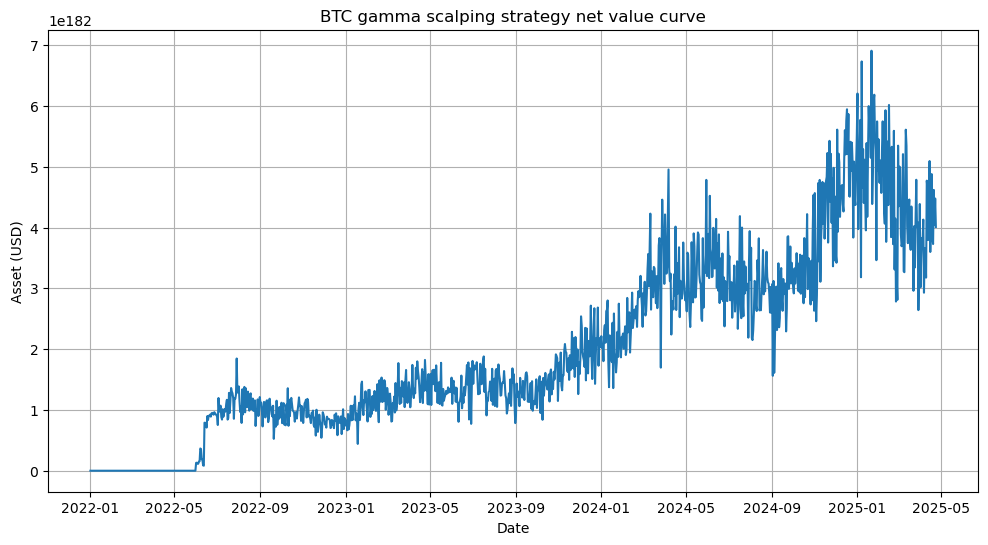

最大回撤: -92.69%
夏普比率: 0.55


In [20]:
# 策略初始化
engine = GammaScalping(df, params["initial_capital"], params["hedge_freq_days"])

results = []
for idx, row in df.iterrows():
    today = row['Date'].date()
    # 到期日建仓
    if today.day == 1:
        if engine.current_position:
            engine.close_position(row)
        try:
            engine.open_position(row)
        except RuntimeError as e:
            print(f"建仓失败: {e}")
            continue
    # 对冲
    if engine.current_position and (engine.current_position['last_hedge_day'] is None or (today - engine.current_position['last_hedge_day']).days >= params["hedge_freq_days"]):
        call_delta, put_delta, perp_delta, total_delta = engine.delta_hedging(row, today)
    else:
        call_delta = put_delta = perp_delta = total_delta = 0.0
    # 组合跟踪
    if engine.current_position:
        record = engine.track_portfolio(row, call_delta, put_delta, perp_delta, total_delta)
        if record:  # Ensure the record is not None or empty
            results.append(record)

if results:
    result_df = pd.DataFrame(results)
    result_df.to_csv('result.csv', index=False)
    display(result_df)
else:
    print("No results to display. Please check the strategy logic.")
    # Create a placeholder DataFrame with necessary columns to avoid KeyError
    result_df = pd.DataFrame(columns=['Date', 'TotalAsset'])

# Ensure result_df is not empty before plotting or calculating metrics
if not result_df.empty:
    # 净值曲线
    plt.figure(figsize=(12, 6))
    # 检查日期列名是否为 'date' 而不是 'Date'
    plt.plot(result_df.index if 'Date' not in result_df.columns else result_df['Date'], 
            result_df['TotalAsset'])
    plt.title("BTC gamma scalping strategy net value curve")
    plt.xlabel("Date")
    plt.ylabel("Asset (USD)")
    plt.grid()
    plt.show()

    # 最大回撤
    roll_max = result_df['TotalAsset'].cummax()
    drawdown = (result_df['TotalAsset'] - roll_max) / roll_max
    max_drawdown = drawdown.min()
    print(f"最大回撤: {max_drawdown:.2%}")

    # 夏普比率
    returns = result_df['TotalAsset'].pct_change().dropna()
    sharpe = returns.mean() / returns.std() * (365 ** 0.5)
    print(f"夏普比率: {sharpe:.2f}")
else:
    print("Result DataFrame is empty. Skipping visualization and metrics calculation.")